## Breast Cancer Cell Detection

You work for the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).

### Data

The dataset consists of 699 cells for which you have the following features:

Sample code number: id number
Clump Thickness: 1 - 10
Uniformity of Cell Size: 1 - 10
Uniformity of Cell Shape: 1 - 10
Marginal Adhesion: 1 - 10
Single Epithelial Cell Size: 1 - 10
Bare Nuclei: 1 - 10
Bland Chromatin: 1 - 10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)

The dataset is also available here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headers = ['sample', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', \
           'single_epi_size', 'bare_nuclei', 'chromatin', 'nucleoli', 'mitoses', 'cancer_class']
raw_data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=headers)
data = raw_data.copy()
data.head()

,sample,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epi_size,bare_nuclei,chromatin,nucleoli,mitoses,cancer_class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Check the different types of values we have for each column
for i in headers:
    print(i, "\n", data[i].value_counts(), "\n")

sample 
 1182404    6
1276091    5
1198641    3
466906     2
1116116    2
          ..
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: sample, Length: 645, dtype: int64 

clump_thickness 
 1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64 

unif_cell_size 
 1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: unif_cell_size, dtype: int64 

unif_cell_shape 
 1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: unif_cell_shape, dtype: int64 

marginal_adhesion 
 1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64 

single_epi_size 
 2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_epi_size, dtype: int64 

bare_nuclei 
 1     402


In [4]:
# Everything looks good except for the bare_nuclei column. Remove those with '?' vals. 
print(len(data))
data = data[data.bare_nuclei != "?"]
data['bare_nuclei'] = data['bare_nuclei'].astype(int)
print(len(data))

699
683


In [5]:
# Check the different types of values we have for each column
print(data['bare_nuclei'].value_counts())

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126cb6750>,
      dtype=object)

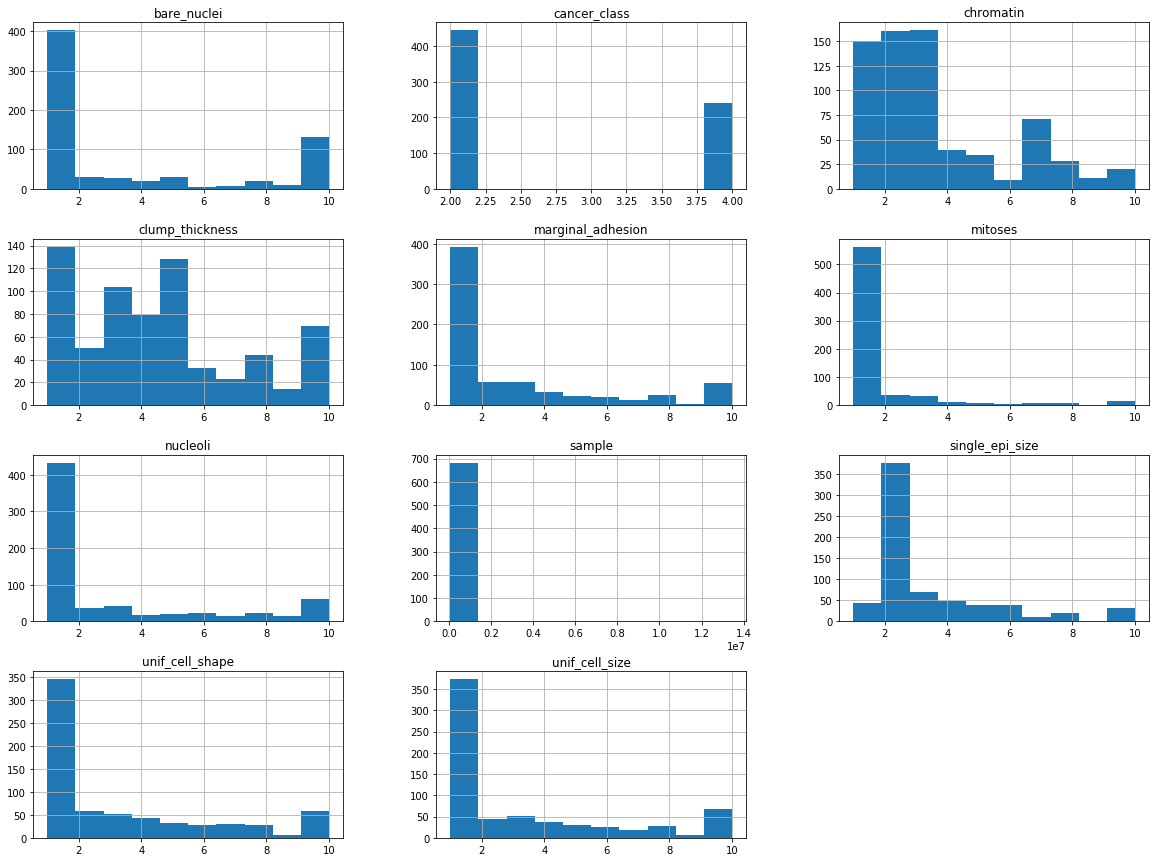

In [6]:
# Take a look at the relationship between these variables. 
data[headers].hist(bins=10, figsize=(20,15))

# Classifiers

In [7]:
# Split data into features and outcome variables
outcome = data.cancer_class
# Recode benign as 0 and malignant as 1
outcome.replace({2:0, 4:1}, inplace=True)
features = data.drop(['cancer_class', 'sample'], axis=1)
print(list(features))

['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epi_size', 'bare_nuclei', 'chromatin', 'nucleoli', 'mitoses']


In [8]:
# Quick feature engineering. 
features['ovr_unif'] = data['unif_cell_size'] * data['unif_cell_shape']

In [9]:
# Some packages
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Some functions
def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y), 4))
    print('Recall:', round(metrics.recall_score(x, y), 4))
    print('ROC_AUC:,', round(metrics.roc_auc_score(x, y), 4))
    print('F1:', round(metrics.f1_score(x, y), 4))

def plot_cm(x, y):
    cm = confusion_matrix(x, y)
    df_cm = pd.DataFrame(cm, columns=np.unique(x), index = np.unique(x))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')# font size
    plt.ylim([0, 2])

## Logistic Classifier
- Advantages: less prone to over-fitting (except with high-dimensional data); gives size and direction of predictors; easy to implement, interpret, and train.
- Disadvantages: assumption of linearity between variables

Accuracy: 0.9416
Precision: 0.8704
Recall: 0.9792
ROC_AUC:, 0.9503
F1: 0.9216
['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epi_size', 'bare_nuclei', 'chromatin', 'nucleoli', 'mitoses', 'ovr_unif'] [[ 0.71067584  0.69120413  0.72214429  0.25107274 -0.0425806   0.44426336
   0.34644755  0.28871358  0.25654637 -0.08524274]]


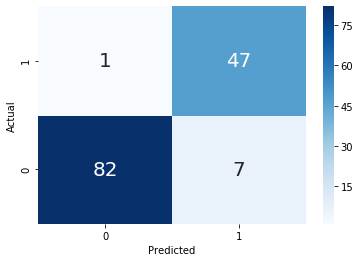

In [10]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(features,  outcome, test_size=0.20, random_state=649)
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
bin_metrics(y_test, y_pred)
plot_cm(y_test, y_pred)
print(list(features), lr.coef_)

## What features of a cell are the largest drivers of malignancy?
1. Clump thickness
1. Bare nuclei
1. Uniform cell shape
1. Uniform cell size

## What features drive your false positive rate? 
- Marginal adhesion and chromatin appear to be the main drivers of false positives

In [11]:
FP = X_test[(y_test == 0) & (y_pred == 1)] # Isolate the false positive cases
TP = X_test[(y_test == 1) & (y_pred ==1)] # Isolare the true positive cases
FN = X_test[(y_test == 1) & (y_pred == 0)] # Isolate the false negative cases

TRUE POSITIVE DISTRIBUTIONS


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285358d0>,
      dtype=object)

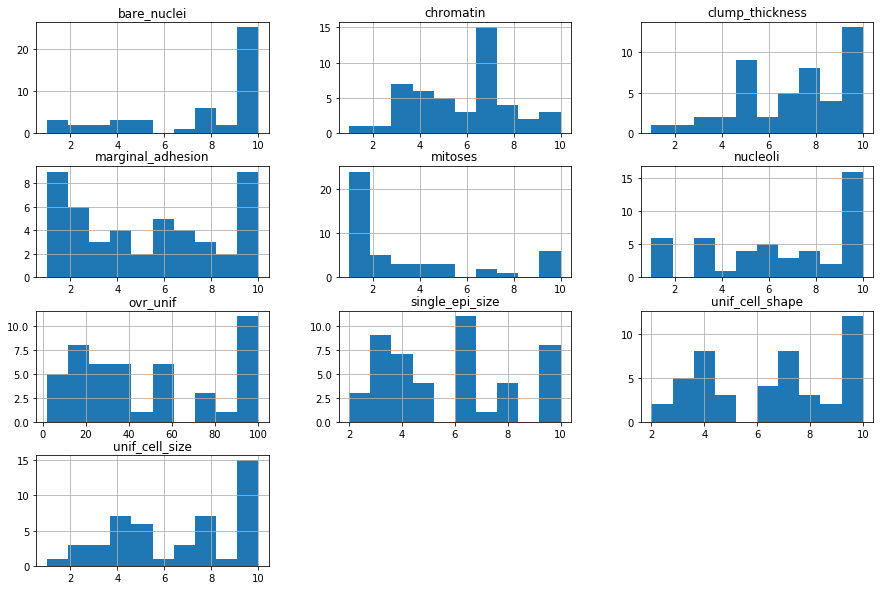

In [12]:
# Compare distribution of features across false positives and true positives
print("TRUE POSITIVE DISTRIBUTIONS")
TP_hds = list(TP)
TP[TP_hds].hist(bins=10, figsize=(15, 10))


TRUE NEGATIVE DISTRIBUTIONS


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129188390>,
      dtype=object)

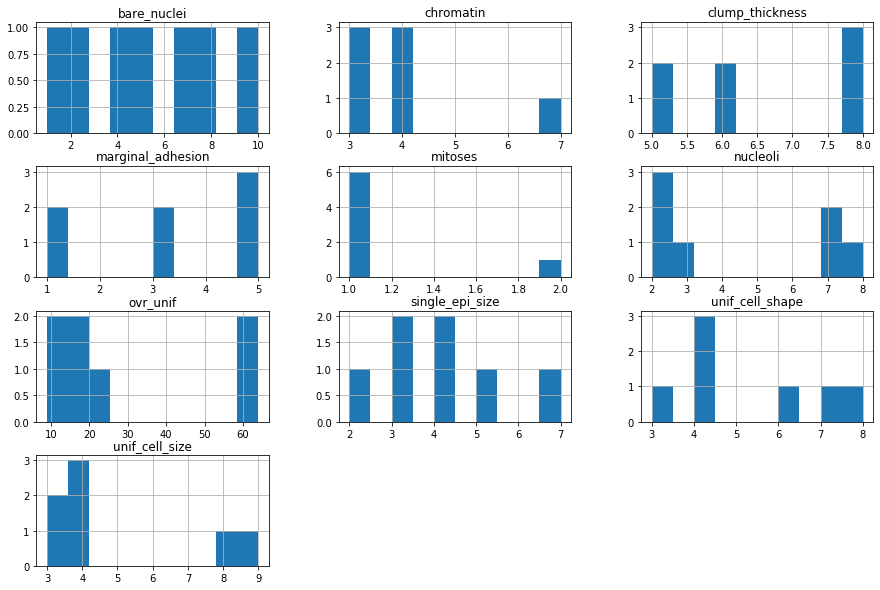

In [13]:
print("\nTRUE NEGATIVE DISTRIBUTIONS")
FP_hds = list(FP)
FP[FP_hds].hist(bins=10, figsize=(15, 10))
# Looks like chromatin, nucleoli, and cell size might all be different across TP and FP. 

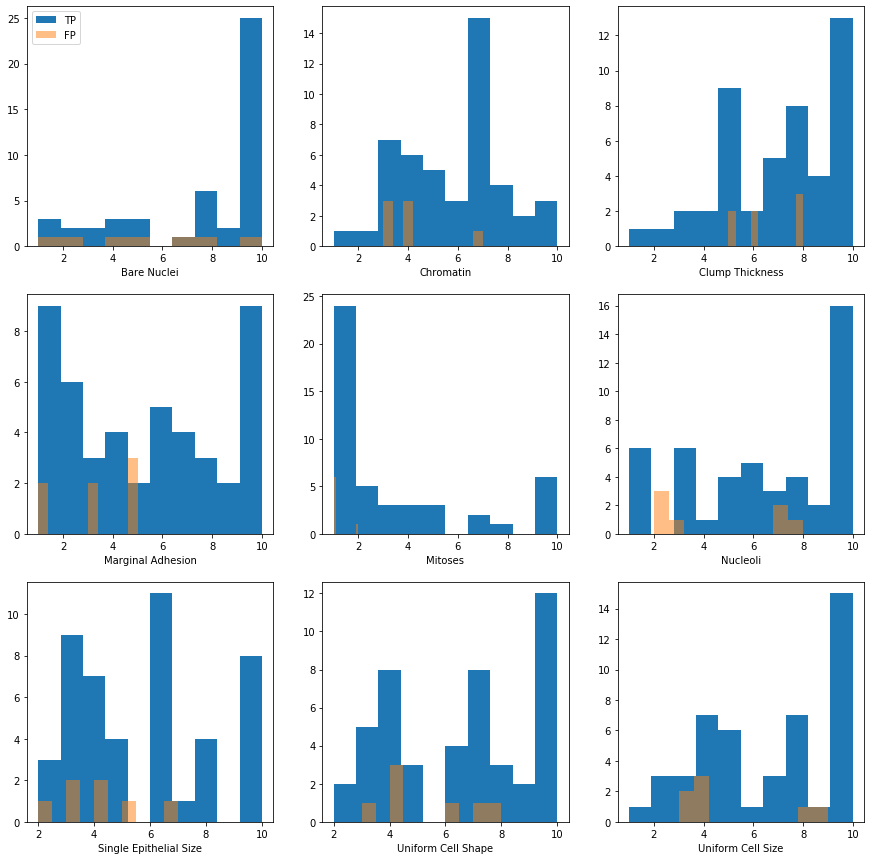

In [14]:
# Another way to look at the distribution comparison
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 15))
ax1.hist(TP['bare_nuclei'], label='TP')
ax1.hist(FP['bare_nuclei'], label='FP', alpha=0.5)
ax1.set_xlabel('Bare Nuclei')
ax2.hist(TP['chromatin'])
ax2.hist(FP['chromatin'], alpha=0.5)
ax2.set_xlabel('Chromatin')
ax3.hist(TP['clump_thickness'])
ax3.hist(FP['clump_thickness'], alpha=0.5)
ax3.set_xlabel('Clump Thickness')
ax4.hist(TP['marginal_adhesion'])
ax4.hist(FP['marginal_adhesion'], alpha=0.5)
ax4.set_xlabel('Marginal Adhesion')
ax5.hist(TP['mitoses'])
ax5.hist(FP['mitoses'], alpha=0.5)
ax5.set_xlabel('Mitoses')
ax6.hist(TP['nucleoli'])
ax6.hist(FP['nucleoli'], alpha=0.5)
ax6.set_xlabel('Nucleoli')
ax7.hist(TP['single_epi_size'])
ax7.hist(FP['single_epi_size'], alpha=0.5)
ax7.set_xlabel('Single Epithelial Size')
ax8.hist(TP['unif_cell_shape'])
ax8.hist(FP['unif_cell_shape'], alpha=0.5)
ax8.set_xlabel('Uniform Cell Shape')
ax9.hist(TP['unif_cell_size'])
ax9.hist(FP['unif_cell_size'], alpha=0.5)
ax9.set_xlabel('Uniform Cell Size')
ax1.legend()
plt.show()

## What features drive your false negative rate?
- With only one false positive, it's hard to say. 

## How would a physician use your product?
- The physician would enter the list of features for the biopsied cells and it would return a probability that the cell was malignant or benign (framing effects matter so could be a feature of deployment). 

## How would you go about determining the most cost-effective method of detecting malignancy?
- Probably look at the relative trade-off between how much information each feature adds compared to the importance of that feature. 
- For example, single epithelial cell size seems to not be predictive at all. Whereas, clump thickness seems to really important data to collect. 